# Image Classification
In this exercise, you will be classifying images about clothes. The data set you will be using is called `fashion-small.csv`.

### Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.


In [105]:
# Import your libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from skimage import io
from skimage.color import rgb2gray

# 1. Inspect and explore our data
1. Load the `fashion-small.csv` data into a pandas dataframe. 
2. Inspect / remove null values. 
3. Inspect / remove duplicate rows. 
4. Print out the number examples in each class aka the class balances. 
5. Visualize at least one image.

In [106]:
# 1. Load data into a pandas dataframe. 
fashion_df = pd.read_csv(".\\data\\fashion-small.csv")

fashion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 785 entries, label to pixel784
dtypes: int64(784), object(1)
memory usage: 35.9+ MB


In [107]:
fashion_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,T-shirt/top,0,0,0,0,0,0,0,0,0,...,66,25,0,0,0,0,0,0,0,0
1,Trouser,0,0,0,0,0,0,0,0,0,...,170,25,0,0,0,0,0,0,0,0
2,Dress,0,0,0,0,0,0,0,0,0,...,76,80,0,0,0,1,0,0,0,0
3,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dress,0,0,0,0,0,0,0,22,53,...,79,78,18,0,2,0,0,0,0,0


### Inspect for null values

In [108]:
# 2. Inspect / remove null values. 
fashion_df.isnull().sum().sum()

0

### Check for duplicates

In [109]:
# 3. Inspect / remove duplicate rows. 
fashion_df.duplicated().sum()

0

### Lets look at our class balances

In [110]:
# 4. Print out the number examples in each class aka the class balances. 
fashion_df.label.value_counts(normalize= True)

Sandal         0.107667
Trouser        0.102000
Ankle boot     0.100833
Shirt          0.100167
Pullover       0.099667
Coat           0.099500
T-shirt/top    0.098333
Dress          0.097500
Bag            0.097333
Sneaker        0.097000
Name: label, dtype: float64

# Visualize one image

## First, we need to create a list that is just our pixel columns

In [111]:
# Grabs all of the columns 
# Convert the all columns object into a regular list
# Remove just the label column from the list

pixel_cols = list(fashion_df.columns)
pixel_cols.remove('label')

# Sanity check that it is now just a list.
print(type(pixel_cols))

<class 'list'>


## Extract one row and reshape it to its original 28x28 shape and plot the reshaped image.

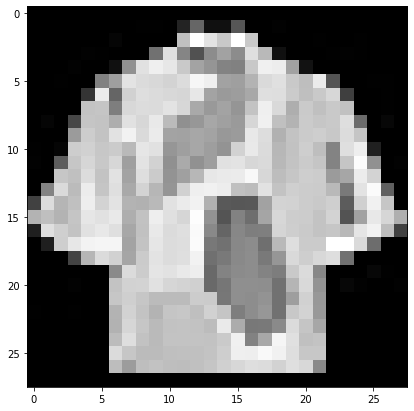

In [112]:
# Select just the pixel columns and convert them to a numpy array by using .values. 
imgs = fashion_df[pixel_cols].values

# Select just one image from all the images
img = imgs[420]

# Reshape the image to be a 28x28 matrix (original format of image)
# Plot reshaped image
plt.figure(figsize=(7,7))
plt.imshow(img.reshape(28,28), cmap= 'gray')

___
# 2. Select and engineer our features.
1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 
2. Define our `X` and `y` data. 
2. Train-test-split our `X` and `y` data

### 1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 

In [113]:
# Grabs all of the columns
# Convert the all columns object into a regular list
# Sanity check that it is now just a list.
# Remove the label column from the list
# This happens 'in place'

selected_features = pixel_cols

print(type(selected_features), len(selected_features))

<class 'list'> 784


### 2. Define our `X` and `y`

In [114]:
# 2. Define our `X` and `y` data. 

X = fashion_df[selected_features]

y = fashion_df['label']

### 3. Train-test-split our `X` and `y` data

In [115]:
# 3. Train-test-split our `X` and `y` data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30)

____
# 3. Build and train our model
1. Initalize an empty Support Vector Classifier model.
2. Fit that model with our training data. 

In [116]:
# Initalize our Support Vector Classifier
model = SVC()

# 2. Fit that model with our training data. 
model.fit(X_train, y_train)

SVC()

___
# 4. Evaluate our model
1. Get a baseline accuracy score.
2. Make new predictions using our test data. 
3. Print the classification report. 
4. Plot the confusion matrix of our predicted results. 

### 1. Get a baseline accuracy score.

In [117]:
### 1. Get and print a baseline accuracy score.
accuracy = model.score(X_test, y_test)
print("Accuracy %f" % accuracy)

Accuracy 0.846667


### 2. Make new predictions using our test data. 

In [118]:
### 2. Make new predictions using our test data. 
y_pred = model.predict(X_test)

### 3. Print the classification report. 
Use the sklearn helper fuction for this. 

In [119]:
### 3. Print the classification report. 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Ankle boot       0.88      0.94      0.91       172
         Bag       0.93      0.92      0.93       186
        Coat       0.81      0.81      0.81       186
       Dress       0.78      0.86      0.82       180
    Pullover       0.77      0.82      0.79       165
      Sandal       0.94      0.93      0.93       202
       Shirt       0.63      0.59      0.61       165
     Sneaker       0.88      0.86      0.87       175
 T-shirt/top       0.82      0.80      0.81       187
     Trouser       1.00      0.91      0.95       182

    accuracy                           0.85      1800
   macro avg       0.84      0.84      0.84      1800
weighted avg       0.85      0.85      0.85      1800



### 4. Plot the confusion matrix of our predicted results. 

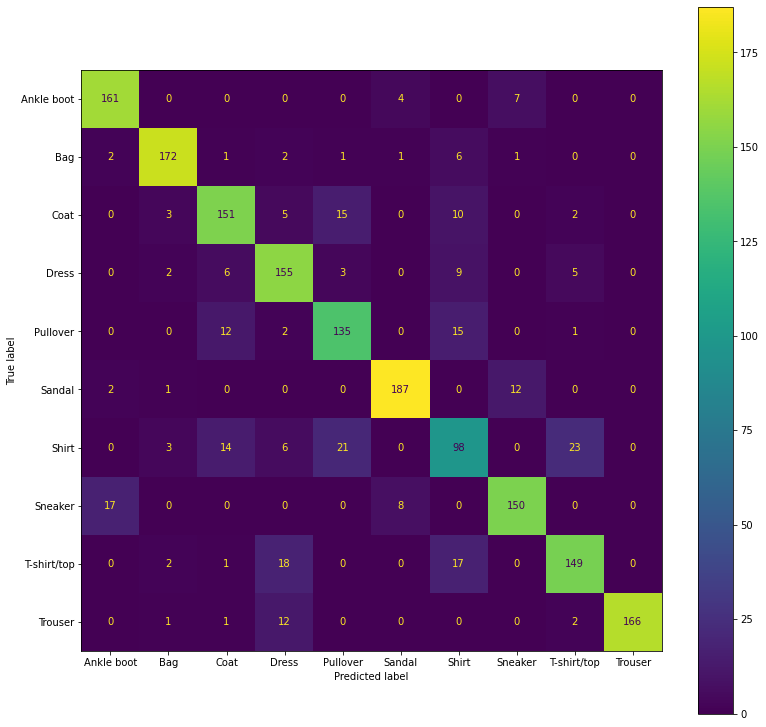

In [120]:
### 4. Plot the confusion matrix of our predicted results.
fig, ax = plt.subplots(figsize=(13,13))
ConfusionMatrixDisplay.from_estimator(estimator= model,
                                      X= X_test,
                                      y = y_test,
                                      ax= ax)

### Looking at the confusion matrix, which two clothing items were mis-classfied with eachother the most?

In [121]:
print('The classifier mistaked Shirts and T-shirts/tops the most.')

The classifier mistaked Shirts and T-shirts/tops the most.


___
### Build a function thats input is an unfitted model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 

In [122]:
### Build a function thats input is an empty model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 
def build_and_eval_model(model, X, y, random_state=23):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state= random_state)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))

    fig, ax = plt.subplots(figsize=(13,13))
    ConfusionMatrixDisplay.from_estimator(estimator= model, X= X_test, y= y_test, ax= ax)
    plt.show()

## Run LogisticRegression, RandomForest, and Multinomial Naive Bayes through the function you just built and compare the results. 
1. Which classifier did the best, and which classifier did the worst. 

In [123]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler

####################################################################################################
Running report for LogisticRegression model.........
              precision    recall  f1-score   support

  Ankle boot       0.91      0.94      0.92       122
         Bag       0.93      0.92      0.93       121
        Coat       0.69      0.75      0.72       115
       Dress       0.82      0.82      0.82       120
    Pullover       0.75      0.71      0.73       133
      Sandal       0.95      0.86      0.91       140
       Shirt       0.57      0.55      0.56       121
     Sneaker       0.84      0.88      0.86       117
 T-shirt/top       0.71      0.76      0.74       113
     Trouser       0.96      0.94      0.95        98

    accuracy                           0.81      1200
   macro avg       0.81      0.81      0.81      1200
weighted avg       0.81      0.81      0.81      1200



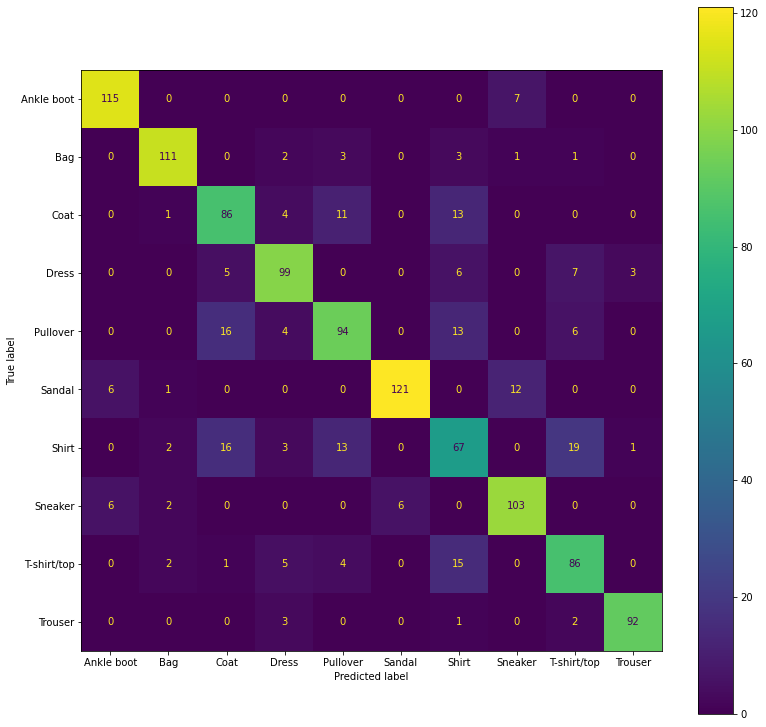

####################################################################################################
Running report for RandomForest model.........
              precision    recall  f1-score   support

  Ankle boot       0.91      0.93      0.92       122
         Bag       0.91      0.96      0.94       121
        Coat       0.68      0.79      0.73       115
       Dress       0.82      0.93      0.87       120
    Pullover       0.76      0.71      0.73       133
      Sandal       0.94      0.92      0.93       140
       Shirt       0.67      0.53      0.59       121
     Sneaker       0.90      0.88      0.89       117
 T-shirt/top       0.83      0.84      0.83       113
     Trouser       0.98      0.93      0.95        98

    accuracy                           0.84      1200
   macro avg       0.84      0.84      0.84      1200
weighted avg       0.84      0.84      0.84      1200



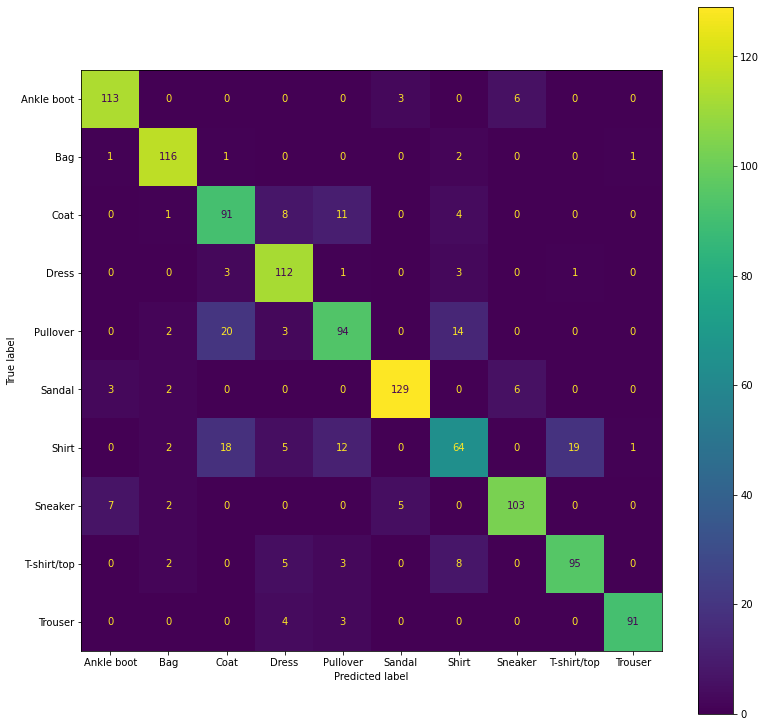

####################################################################################################
Running report for MultinomialNB model.........
              precision    recall  f1-score   support

  Ankle boot       0.69      0.85      0.76       122
         Bag       0.88      0.85      0.87       121
        Coat       0.42      0.55      0.47       115
       Dress       0.67      0.90      0.77       120
    Pullover       0.65      0.60      0.62       133
      Sandal       0.79      0.08      0.14       140
       Shirt       0.33      0.14      0.20       121
     Sneaker       0.51      0.93      0.66       117
 T-shirt/top       0.73      0.81      0.76       113
     Trouser       0.96      0.89      0.92        98

    accuracy                           0.64      1200
   macro avg       0.66      0.66      0.62      1200
weighted avg       0.66      0.64      0.60      1200



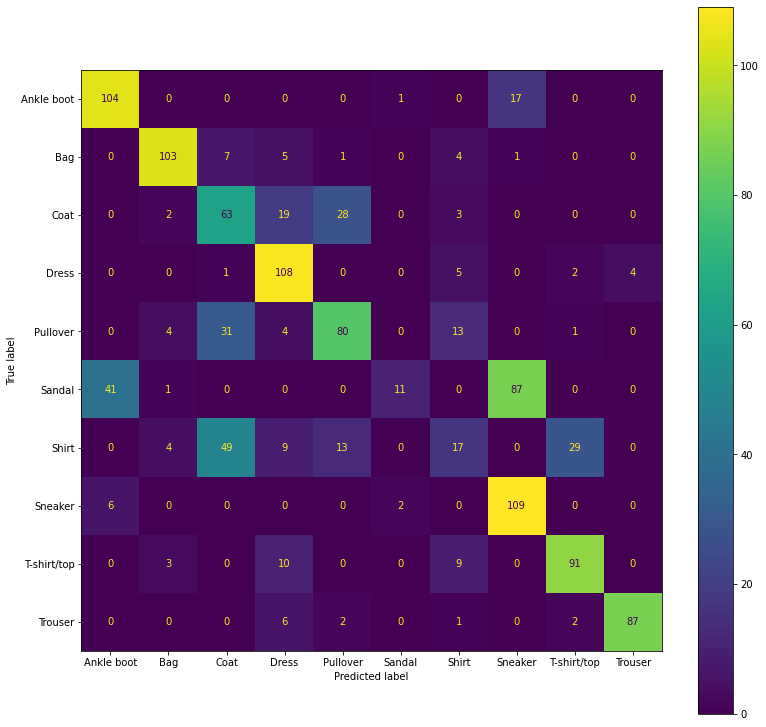

In [124]:
# hides max iter warning
import warnings
warnings.filterwarnings("ignore")


pipeline = {'LogisticRegression': LogisticRegression(), 'RandomForest': RandomForestClassifier(), 'MultinomialNB': MultinomialNB()}

for key, value in pipeline.items():
    print('#'*100)
    print(f'Running report for {key} model.........')
    # Attempt to scale data to resolve convergence failure/iterations limit
    # pipe = make_pipeline(StandardScaler(), value)
    build_and_eval_model(value, X, y)

In [125]:
print('RandomForest model did the best and MultinomialDB model did the worst.')

RandomForest model did the best and MultinomialDB model did the worst.


# Dope Extra Credit
### This is going to take some python trickery to get working.  The files are large, in all sorts of strange directories, and in color.  This will not only challenge your data science skills, but also your general 'hacker' skills. 

* Use this data provided Intel to build a classifier for color images in directories: 
* [https://www.kaggle.com/datasets/puneet6060/intel-image-classification](https://www.kaggle.com/datasets/puneet6060/intel-image-classification)
* If you have any issues, just slack me.  I got slack on my phone and love hearing your battle stories 